# Introduction

#### Breast cancer is one of the most prevalent and life-threatening diseases affecting women worldwide. Early detection and accurate diagnosis play a crucial role in improving treatment outcomes. In this notebook, we explore the Breast Cancer dataset, a widely used dataset in the medical and machine learning community. The primary goal of this analysis is to:.Understand the structure and distribution of the data. Identify potential outliers and skewed features. Apply appropriate transformations where necessary. Draw meaningful insights that can support predictive modeling in later stages. This Exploratory Data Analysis (EDA) balances both technical rigor and domain context, especially around biological interpretations of extreme values and their diagnostic significance.

# Importing Libraries

In [1]:
import pandas as pd # for data Manipulation
import numpy as np # for data analysis

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100  # Clearer plots

In [3]:
from scipy import stats # It gives you access to a huge collection of statistical functions — perfect for EDA

# Data Import

In [4]:
Cancer_data = pd.read_csv("breast_cancer.csv") 
Cancer_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Convert all possible columns to numeric, keep text as-is
Cancer_data = Cancer_data.apply(pd.to_numeric, errors='ignore')

In [6]:
print(Cancer_data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
Cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
Cancer_data.info() # It gives basic info about dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### as we see total number of rows is equal to non- null value. It means absense of non null values

# Data Cleaning and Data Transformation

In [9]:
Cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## checking Null values

In [10]:
Cancer_data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### This returns a DataFrame of Boolean values (True or False) .For every cell in your DataFrame:
### True = the value is missing (NaN)
### False = the value is present

## dopiing of Id column


In [11]:
Cancer_data.drop(['id'], axis = 1 , inplace = True) # id column not providing useful information
Cancer_data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
print(Cancer_data['diagnosis'].unique()) # target feature

['M' 'B']


### transforming Target feature (from categorical to numeric)

In [13]:
Cancer_data['diagnosis'] = Cancer_data['diagnosis'].astype(str).str.strip().str.upper()
# .astype(str): convert value in diagnosis into string type- (type casting)
# .str.strip(): Removes leading and trailing whitespace from each string.
# .str.upper(): Converts all letters to uppercase.

In [14]:
Cancer_data['diagnosis'] = Cancer_data['diagnosis'].map({'M': 0, 'B': 1})
Cancer_data.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
62,0,14.250,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,...,17.67,29.51,119.10,959.5,0.1640,0.62470,0.6922,0.1785,0.2844,0.11320
201,0,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,...,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.3508,0.1939,0.2928,0.07867
557,1,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.0000,0.0000,0.2475,0.06969
176,1,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,...,11.26,24.39,73.07,390.2,0.1301,0.29500,0.3486,0.0991,0.2614,0.11620
29,0,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,...,20.01,19.52,134.90,1227.0,0.1255,0.28120,0.2489,0.1456,0.2756,0.07919


In [15]:
print(Cancer_data['diagnosis'].value_counts(dropna=False)) #counting total number numer of benign and malignant
# 0- malignant
# 1 - benign

diagnosis
1    357
0    212
Name: count, dtype: int64


In [16]:
numerical_df = Cancer_data.select_dtypes(include=[np.number])

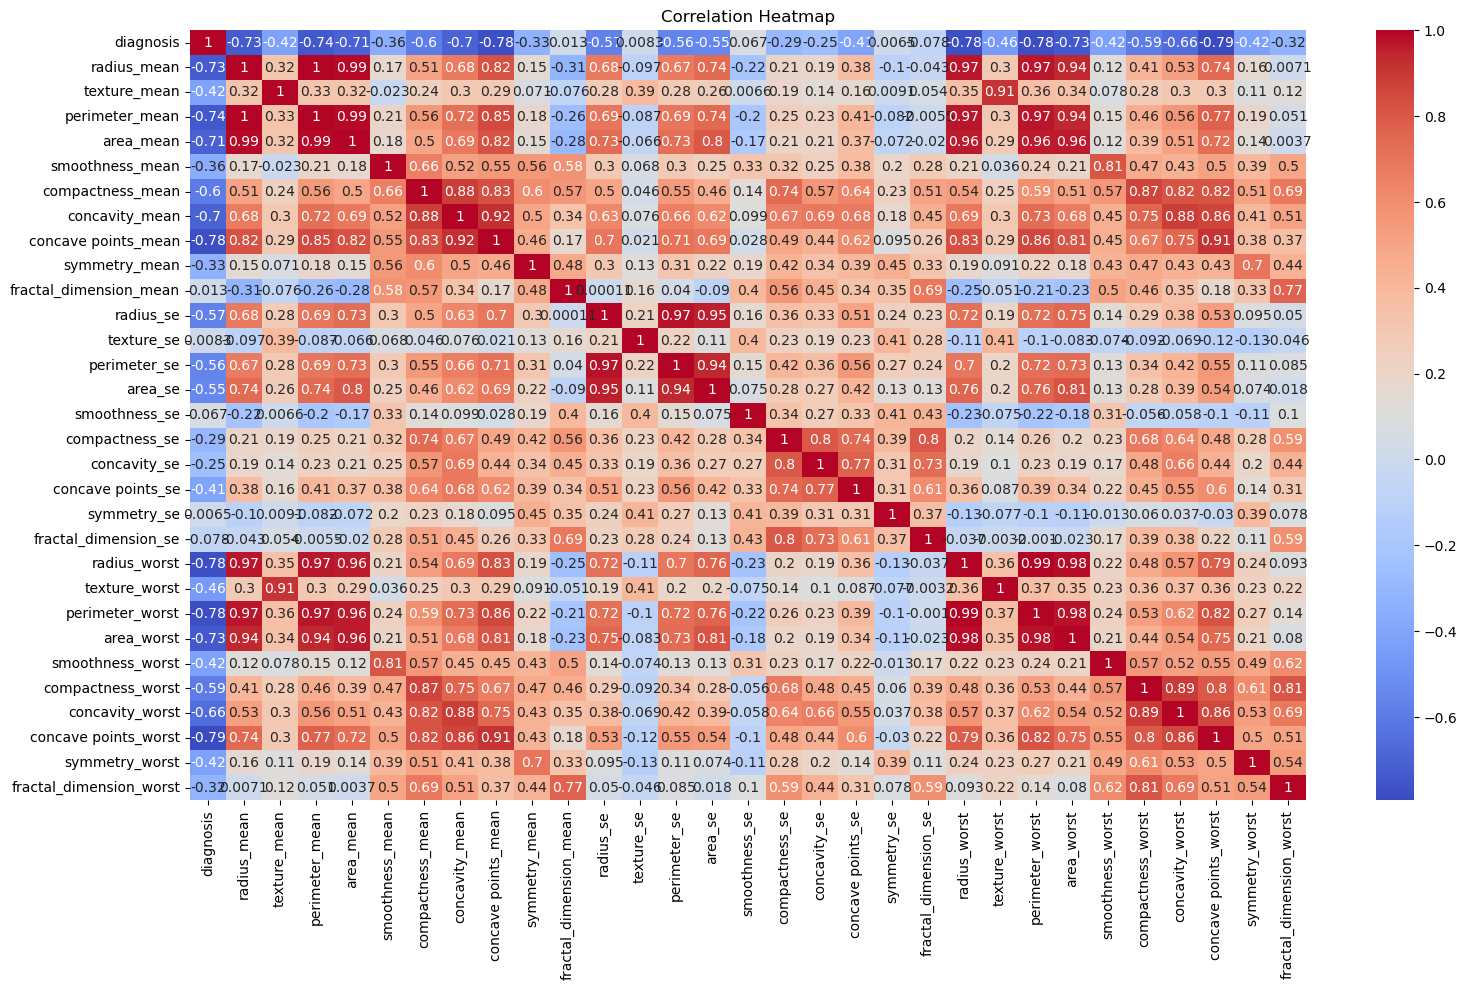

In [17]:
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
print(corr['radius_mean']['radius_worst'])
print(corr['texture_mean']['texture_worst'])
print(corr['smoothness_mean']['smoothness_worst'])
print(corr['compactness_mean']['compactness_worst'])
print(corr['concavity_mean']['concavity_worst'])
print(corr['concave points_mean']['concave points_worst'])
print(corr['symmetry_mean']['symmetry_worst'])

0.9695389726112055
0.912044588840421
0.8053241954943627
0.8658090398022629
0.8841026390943817
0.9101553142985918
0.6998257976437302


## Removal of Highly corelated columns.

### A correlation close to +1 or -1 (e.g., 0.9 or -0.9) means that as one variable increases, the other also increases or decreases in a predictable way.
### In data analysis, this usually means the features carry redundant information i.e high correlation typically indicates that two features have similar patterns of values. 
### like radius_mean and perimeter_mean have correlation of 1, it indicates as the radius increases, the perimeter also increases. So keeping both isn't useful — it doesn't add extra information, just noise or redundancy for your models.

In [19]:
# Upper triangle of correlation matrix (excluding self-correlations)
upper = corr.where(
    np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find columns with correlation > 0.55 (you can adjust threshold)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_reduced = Cancer_data.drop(columns=to_drop)

In [20]:
df_reduced.shape

(569, 21)

In [21]:
df_reduced.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,0,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,0,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [22]:
df_reduced["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

# Data Distribution and use of boxplot to detect outliers

In [23]:
df_reduced.head(2)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902


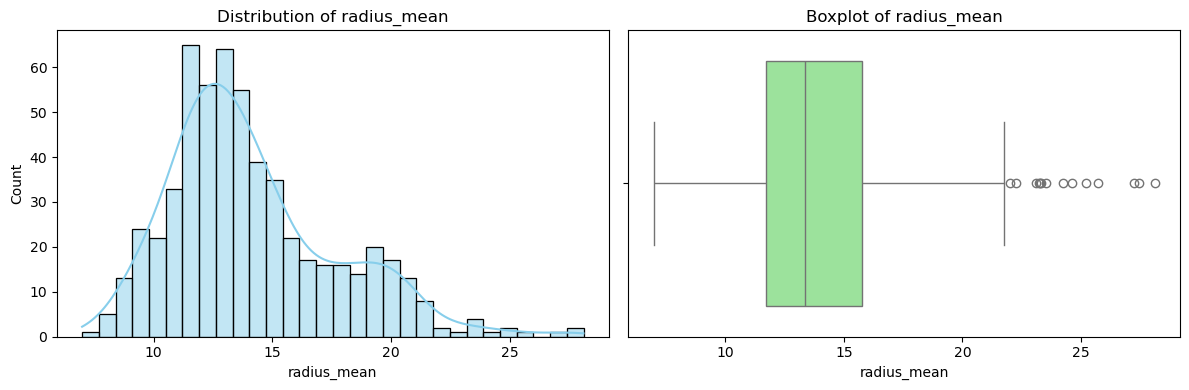

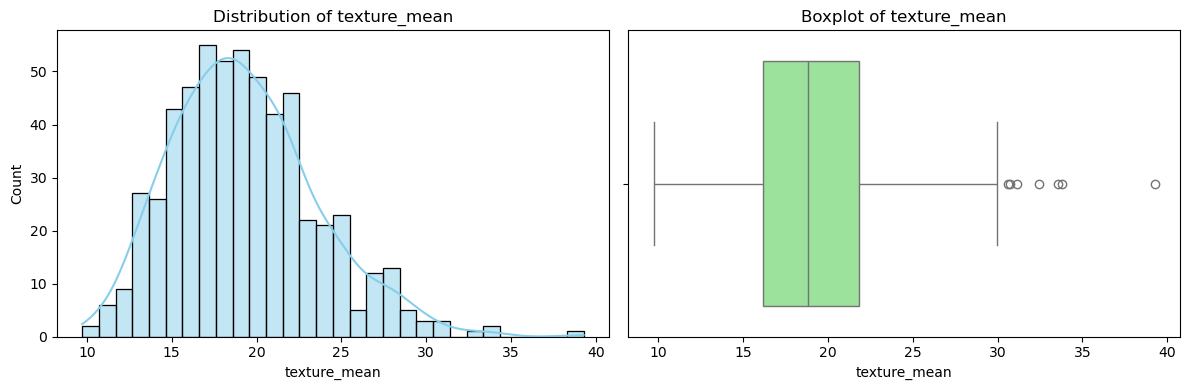

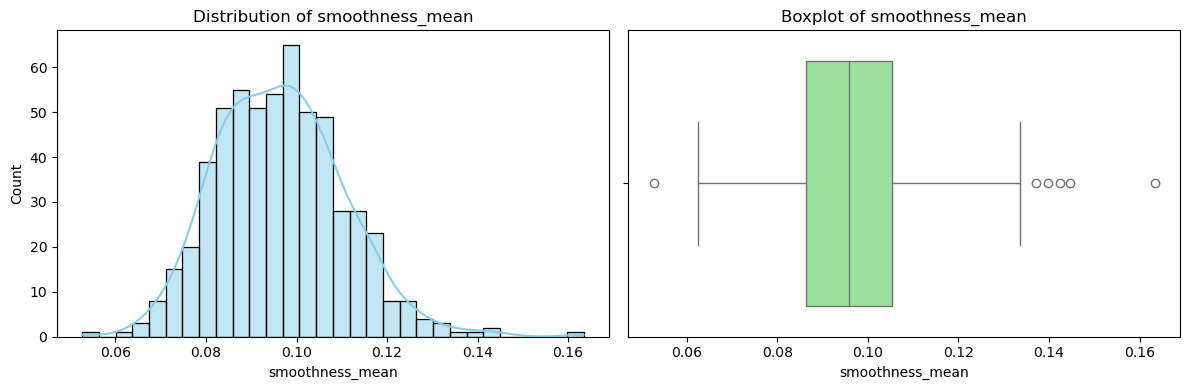

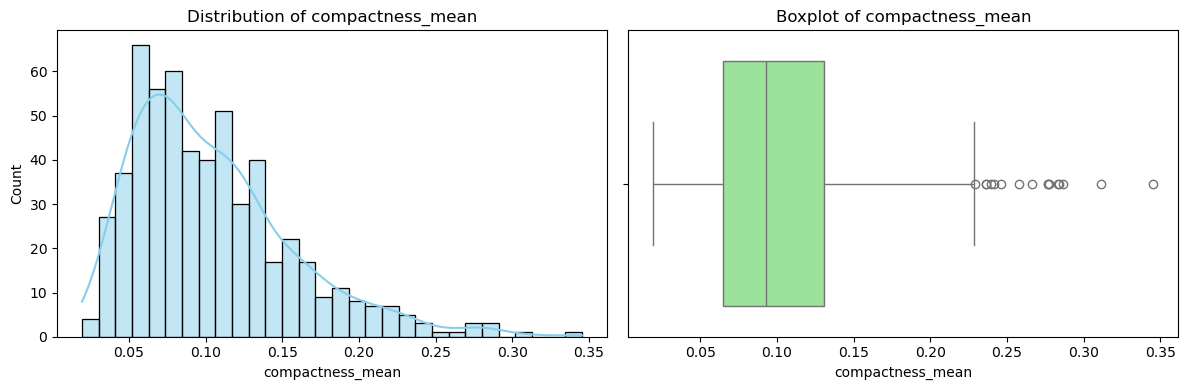

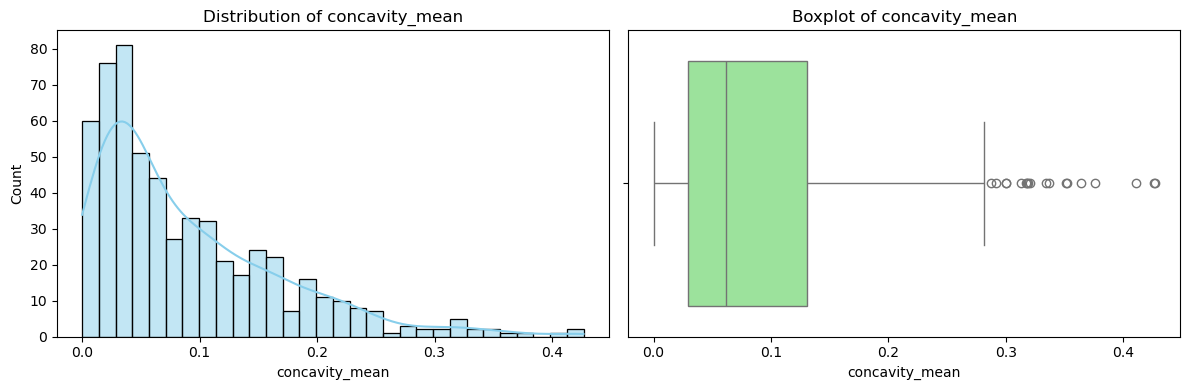

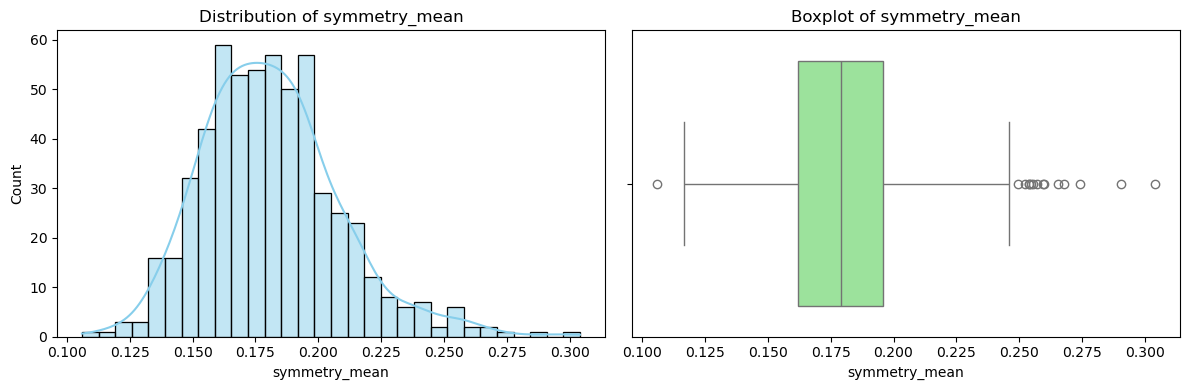

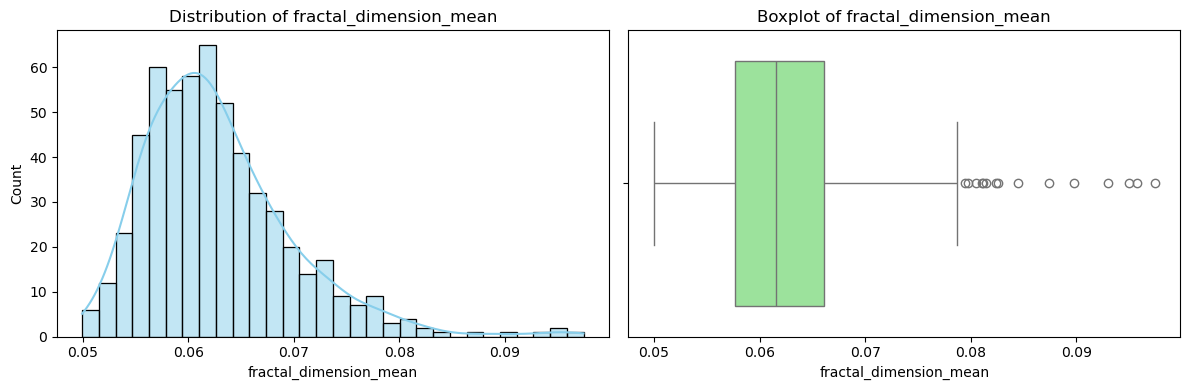

In [24]:
# data distribution
cols = ['radius_mean', 'texture_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
     # Histogram + KDE
    sns.histplot(df_reduced[col], bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)

# Boxplot
    sns.boxplot(x=df_reduced[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


## Findings :
### All the feature distributions, except for smoothness_mean, exhibit right skewness. Additionally, boxplots indicate the presence of outliers in these features. Therefore, a log transformation is necessary to normalize the data and prepare it for further analysis."

# log transformation

In [25]:
# Copy original DataFrame
df_log = df_reduced.copy()

# Apply log1p transformation to all columns except 'smoothness_mean'
for col in df_log.columns:
    if col != 'smoothness_mean':
        df_log[col] = np.log1p(df_log[col])

In [26]:
# Create a new DataFrame for cleaned data
df_cleaned = df_log.copy()

# Apply IQR outlier removal (except for smoothness_mean)
for col in df_cleaned.columns:
    if col == 'smoothness_mean':
        continue  # skip this column

    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]


In [27]:
print("Original shape:", df_reduced.shape)
print("After log + outlier removal:", df_cleaned.shape)

Original shape: (569, 21)
After log + outlier removal: (396, 21)


## comparison before and after log transormation

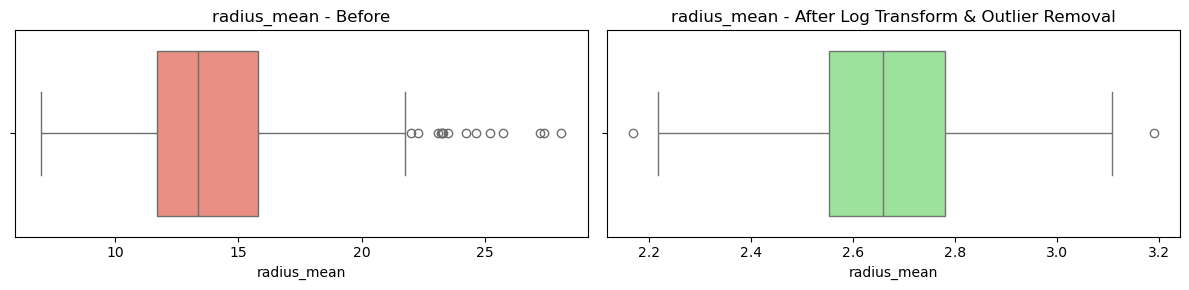

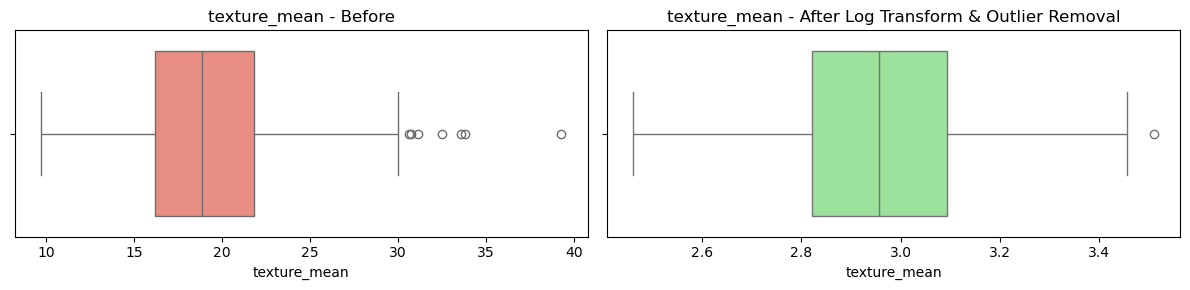

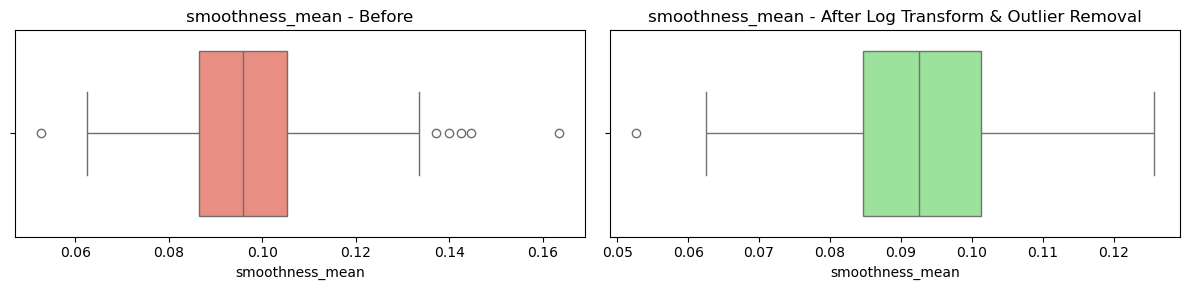

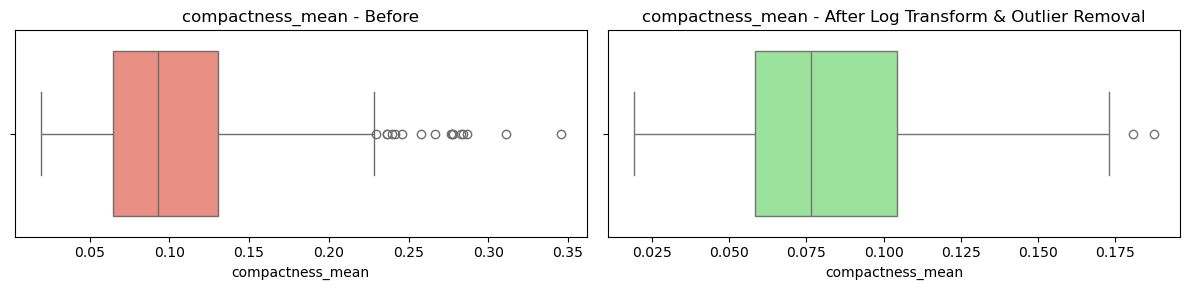

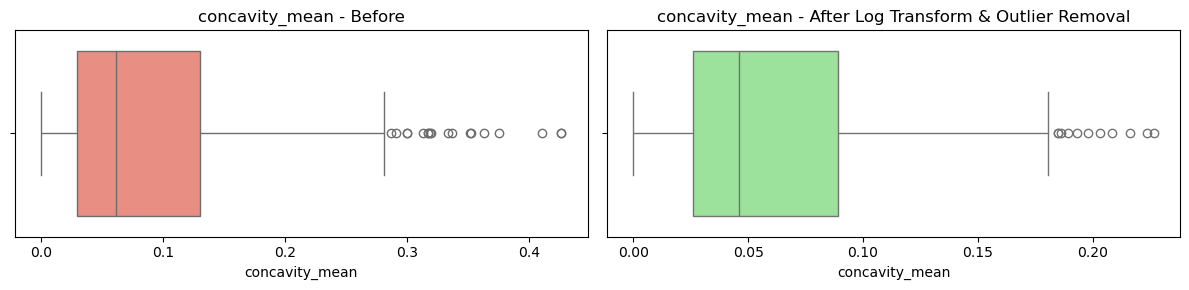

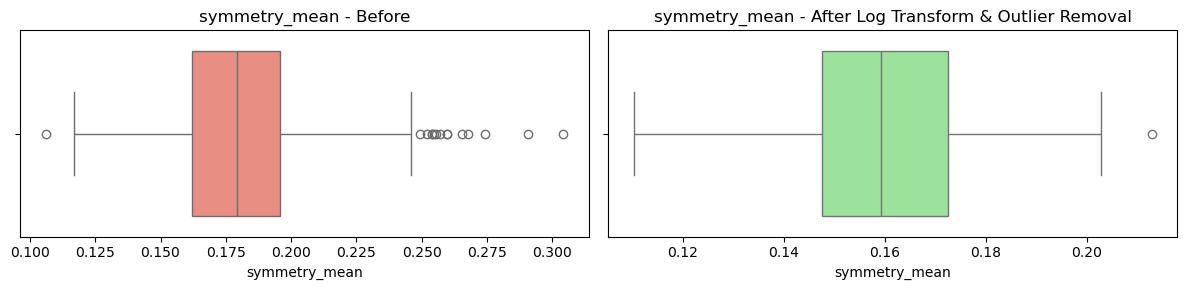

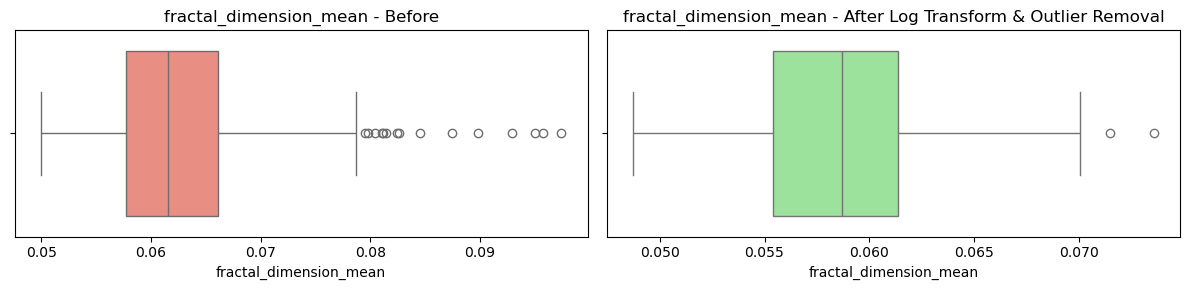

In [28]:
sample_cols = ['radius_mean', 'texture_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']
for col in sample_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))

    sns.boxplot(x=df_reduced[col], ax=axs[0], color='salmon')
    axs[0].set_title(f"{col} - Before")

    sns.boxplot(x=df_cleaned[col], ax=axs[1], color='lightgreen')
    axs[1].set_title(f"{col} - After Log Transform & Outlier Removal")

    plt.tight_layout()
    plt.show()

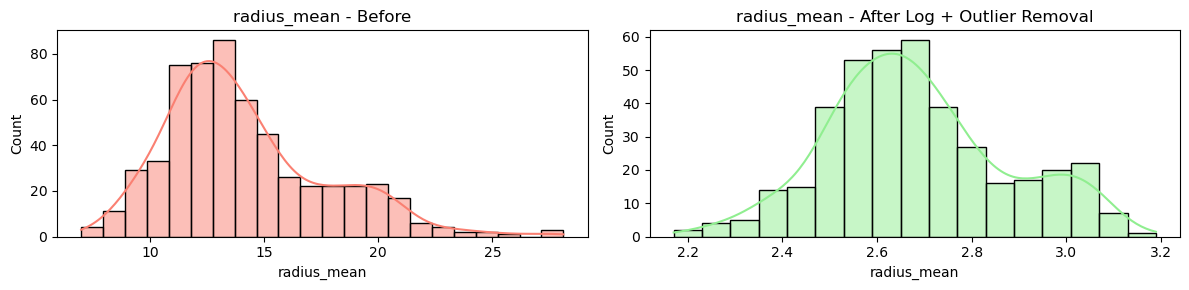

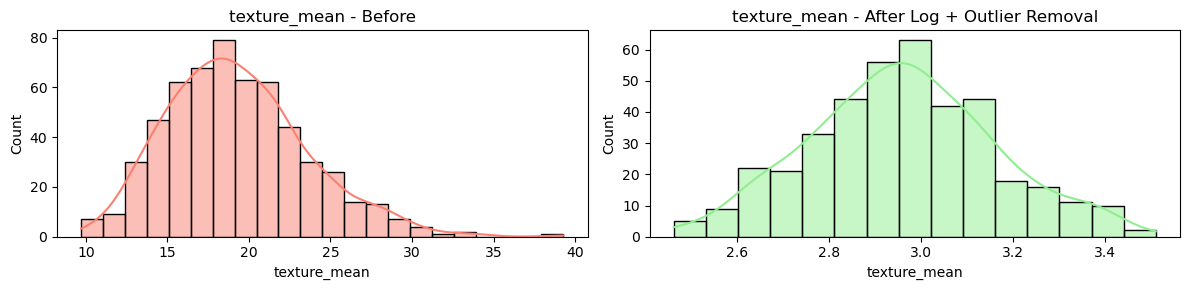

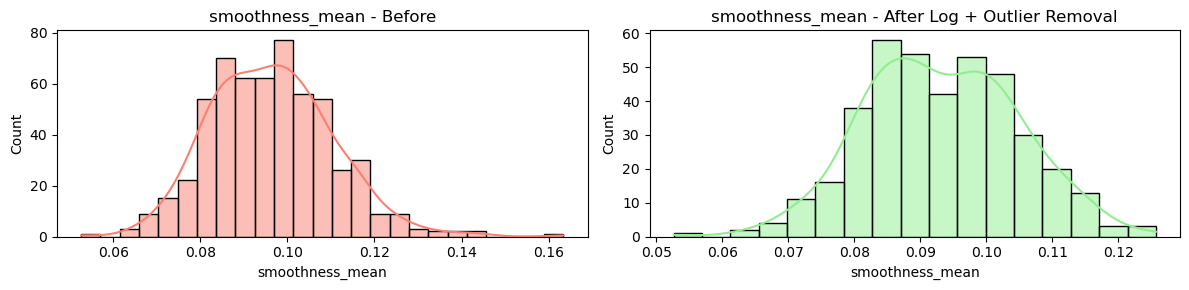

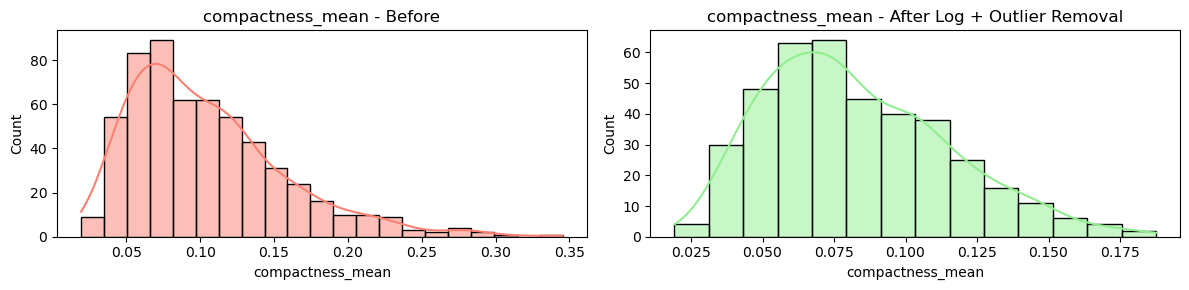

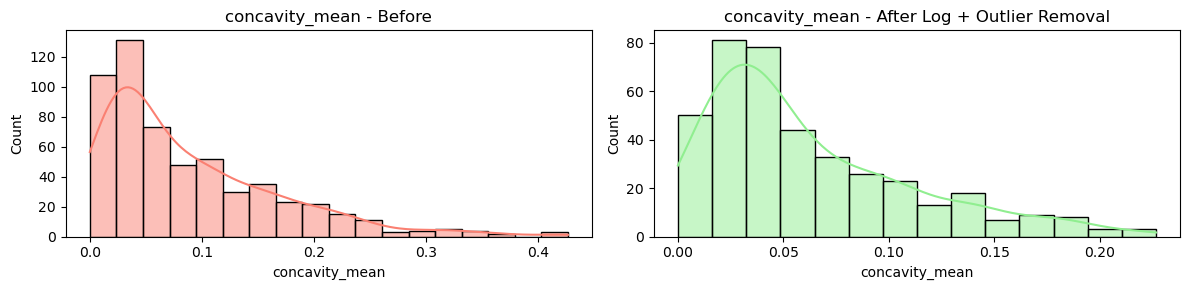

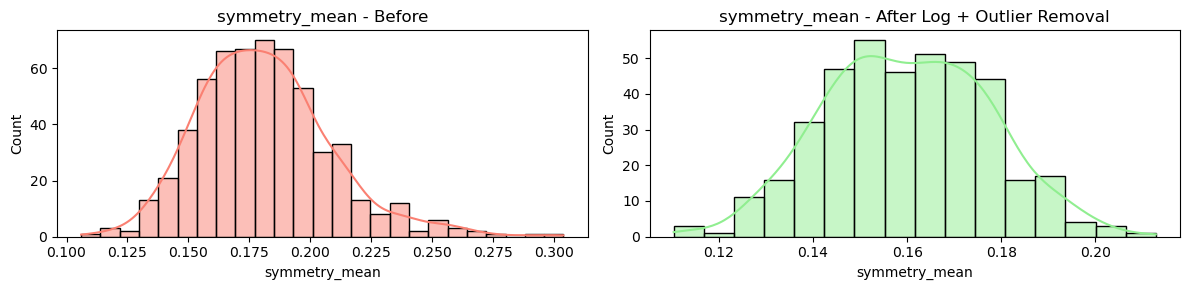

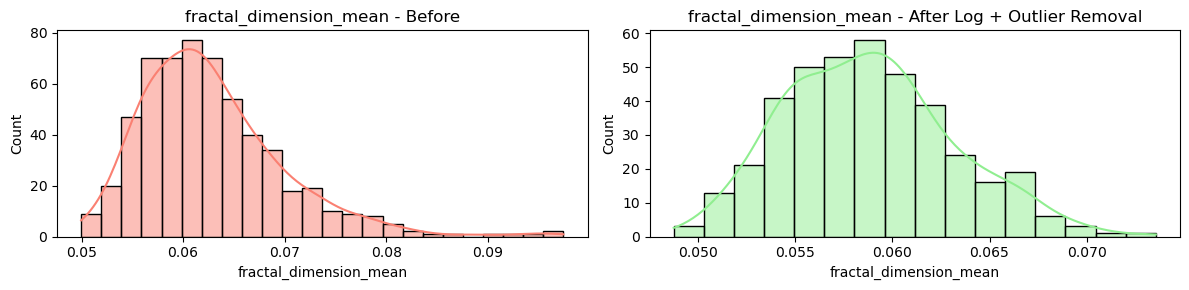

In [29]:
# distribution befor and after log transformation
for col in sample_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))

    sns.histplot(df_reduced[col], ax=axs[0], kde=True, color='salmon')
    axs[0].set_title(f"{col} - Before")

    sns.histplot(df_cleaned[col], ax=axs[1], kde=True, color='lightgreen')
    axs[1].set_title(f"{col} - After Log + Outlier Removal")

    plt.tight_layout()
    plt.show()

### My observation is that Log transformation only reduces skewness, but it doesn’t guarantee normality. Some features are inherently non-normal (e.g., radius_mean, smoothness_mean, sizes etc). hence we see pensence of skewness.

### Incase of outliers,  Log transformation only reduces the impact and number of outliers, But a few still remain, which is normal and expected in real-world data. Log transformation compresses extreme values, but doesn’t remove them. some outliers might still lie outside the IQR bounds even after transformation.

# Visualization 

## Count plot

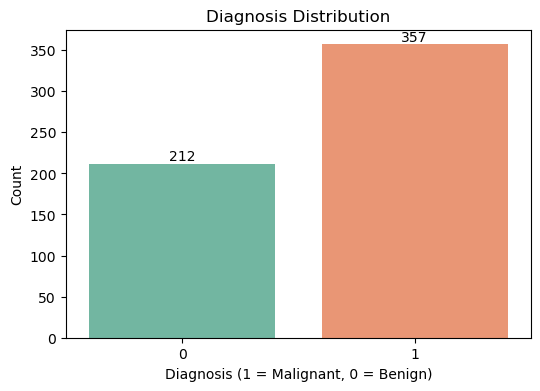

In [30]:
plt.figure(figsize=(6, 4)) # we are using original data not transformed when because we want to see class distribution
ax = sns.countplot(x='diagnosis', data=df_reduced, palette='Set2')

# Add text labels (counts) on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (1 = Malignant, 0 = Benign)')
plt.ylabel('Count')
plt.show()

#### countplot also can be used as class distribution, class distribution refers to how many samples belong to each class (label) in your target column. In this dataset, the target is typically the diagnosis column:
#### M = Malignant (cancerous)
#### B = Benign (non-cancerous)

## Histograms

### Histograms are used to visually explore the distribution of a numerical feature — helping you spot skewness, outliers, and patterns. When combined with hue, they’re also great for comparing classes (like benign vs. malignant).

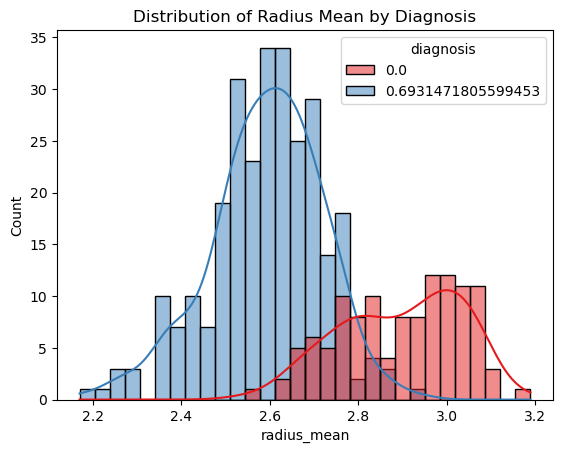

In [31]:
# dataset = cancer_data, hue is used to compare radius mean of benign and malignant cases.
sns.histplot(data=df_cleaned, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30) 
plt.title('Distribution of Radius Mean by Diagnosis')
plt.show()

## this will show: 
### Red (malignant) values are generally higher. Blue (benign) values are clustered lower. It suggests that larger tumors are often malignant.

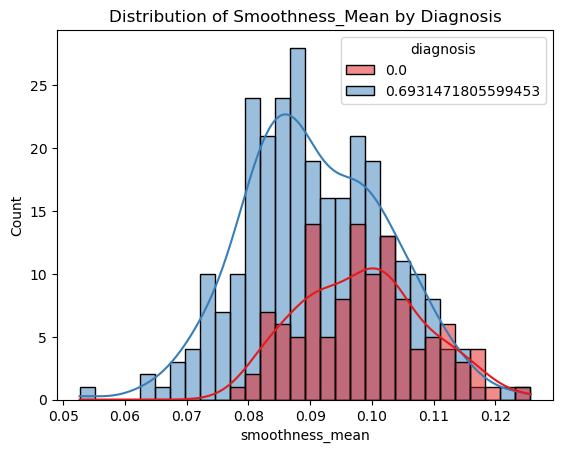

In [32]:
sns.histplot(data=df_cleaned, x='smoothness_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Smoothness_Mean by Diagnosis')
plt.savefig('smoothness_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

### Red and blue overlap a lot. smoothness doesn't strongly separate malignant from benign.

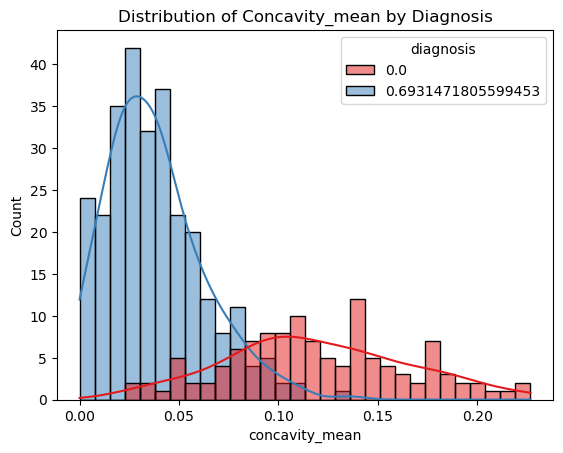

In [33]:
sns.histplot(data=df_cleaned, x='concavity_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Concavity_mean by Diagnosis') # 1 = benign , 0 = Malignant
plt.show()

### red peaks at higher values, blue at lower. it shows strong univariate feature for classification — malignant tumors have large area.

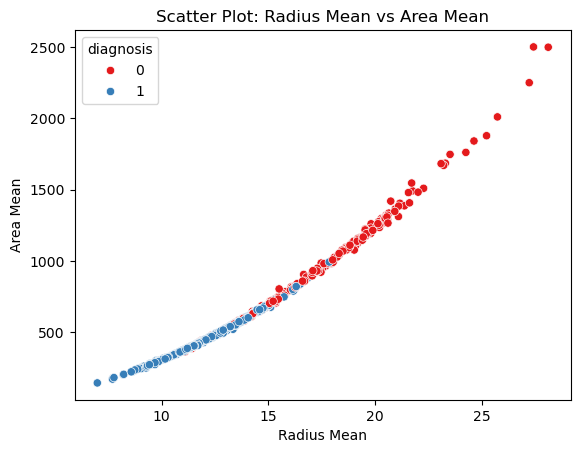

In [34]:
# scatter plot 
sns.scatterplot(data=Cancer_data,
                x='radius_mean',
                y='area_mean',
                hue='diagnosis',         # Color by diagnosis
                palette='Set1')          # Use Set1 color palette

# Add labels and title
plt.title('Scatter Plot: Radius Mean vs Area Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')

# Show the plot
plt.show()

### Strong positive correlation. Bigger radius_mean → bigger area_mean. Red points dominate the top-right (large size).🔍 Suggests: Malignant tumors tend to be both wide and have large areas

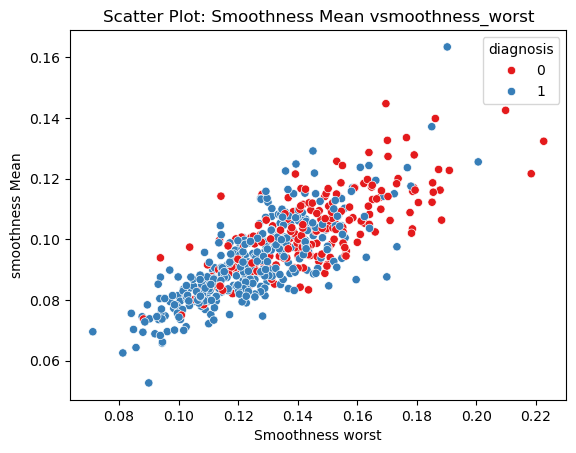

In [35]:
# scatter plot 
sns.scatterplot(data=Cancer_data,
                x='smoothness_worst',
                y='smoothness_mean',
                hue='diagnosis',         # Color by diagnosis
                palette='Set1')          # Use Set1 color palette

# Add labels and title
plt.title('Scatter Plot: Smoothness Mean vsmoothness_worst')
plt.xlabel('Smoothness worst')
plt.ylabel('smoothness Mean')

# Show the plot
plt.show()

#### scatter plot shows overlapping.

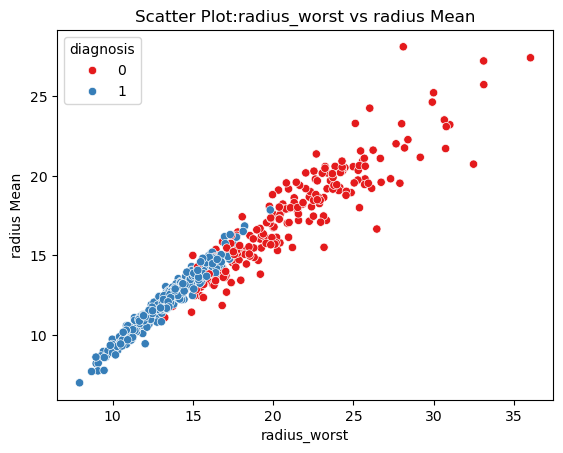

In [36]:
# scatter plot 
sns.scatterplot(data=Cancer_data,
                x= 'radius_worst',
                y='radius_mean',
                hue='diagnosis',         # Color by diagnosis
                palette='Set1')          # Use Set1 color palette
# Add labels and title
plt.title('Scatter Plot:radius_worst vs radius Mean')
plt.xlabel('radius_worst')
plt.ylabel('radius Mean')

# Show the plot
plt.show()

#### from this we can understand malignant tumors are big in size and benign are small.

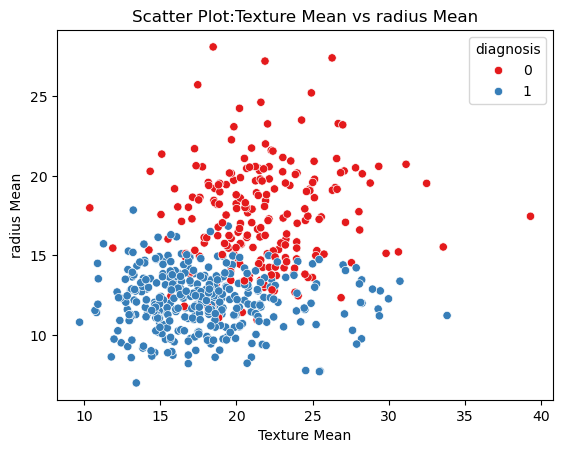

In [37]:

# scatter plot 
sns.scatterplot(data=Cancer_data,
                x='texture_mean',
                y='radius_mean',
                hue='diagnosis',         # Color by diagnosis
                palette='Set1')          # Use Set1 color palette
# Add labels and title
plt.title('Scatter Plot:Texture Mean vs radius Mean')
plt.xlabel('Texture Mean')
plt.ylabel('radius Mean')

# Show the plot
plt.show()

#### malignant tumors are big in size as compared to benign one. 

In [38]:
df_reduced.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758


In [39]:
''' Concavity describes the severity of inward curves (concave portions) along the edges of the tumor — irregular or more concave shapes are often associated with malignancy.
concavity_mean tells you how generally concave the tumor edges are.concavity_worst focuses on the most extreme concavity, often a stronger indicator of malignancy.
'''


' Concavity describes the severity of inward curves (concave portions) along the edges of the tumor — irregular or more concave shapes are often associated with malignancy.\nconcavity_mean tells you how generally concave the tumor edges are.concavity_worst focuses on the most extreme concavity, often a stronger indicator of malignancy.\n'

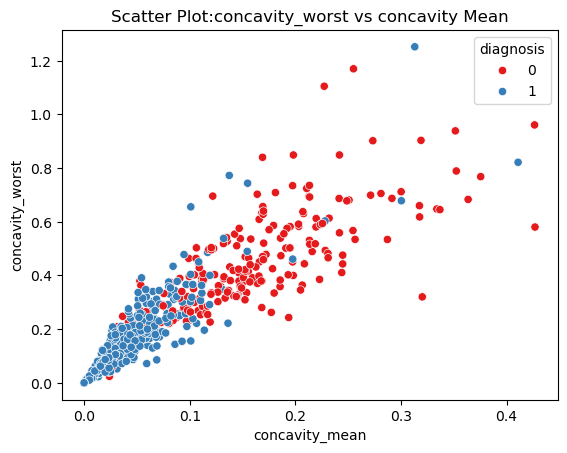

In [41]:
sns.scatterplot(data=Cancer_data,
                x='concavity_mean',
                y='concavity_worst',
                hue='diagnosis',         # Color by diagnosis
                palette='Set1')          # Use Set1 color palette
# Add labels and title
plt.title('Scatter Plot:concavity_worst vs concavity Mean')  
plt.xlabel('concavity_mean')
plt.ylabel('concavity_worst')

# Show the plot
plt.show()

#### "Malignant tumors tend to have higher concavity_mean and concavity_worst values, indicating more irregular tumor borders

In [42]:
df_cleaned.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
1,0.0,3.071303,2.932260,0.08474,0.075701,0.083330,0.166531,0.055122,0.434053,0.550373,...,0.012995,0.018429,0.013311,0.013794,0.003526,0.116716,0.171092,0.216401,0.242946,0.085278
2,0.0,3.029650,3.102342,0.10960,0.148334,0.180153,0.188055,0.058259,0.557098,0.580482,...,0.039278,0.037604,0.020371,0.022251,0.004561,0.134880,0.353821,0.371839,0.308440,0.083955
4,0.0,3.058237,2.730464,0.10030,0.124692,0.180653,0.166277,0.057165,0.563722,0.577343,...,0.024312,0.055321,0.018675,0.017408,0.005102,0.128745,0.186480,0.336472,0.212204,0.073975


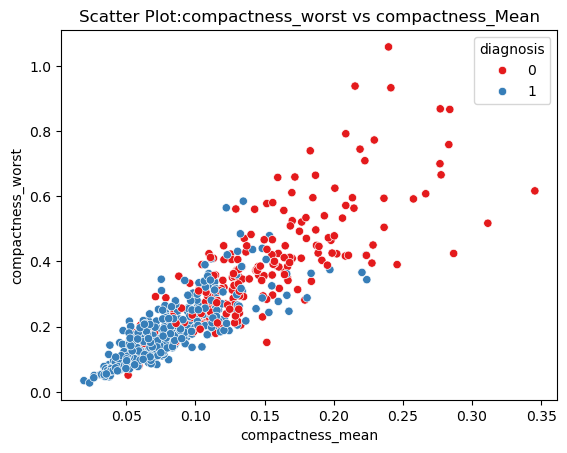

In [43]:
sns.scatterplot(data=Cancer_data,
                x='compactness_mean',
                y='compactness_worst',
                hue='diagnosis',         # Color by diagnosis
                palette='Set1')          # Use Set1 color palette
# Add labels and title
plt.title('Scatter Plot:compactness_worst vs compactness_Mean') 
plt.xlabel('compactness_mean')
plt.ylabel('compactness_worst')

# Show the plot
plt.show()

#### lower compactness value means tumor boundary is relatively smooth and well-contained and it is often associated with benign tumors. while high compactness value associated with irregular shape and malignant tumor


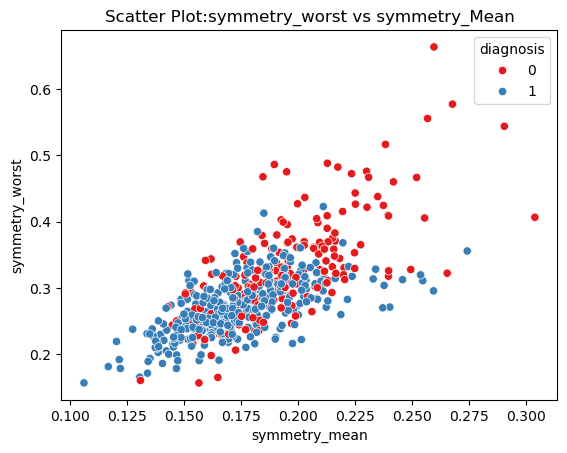

In [44]:
sns.scatterplot(data=df_reduced,
                x='symmetry_mean',
                y='symmetry_worst',
                hue='diagnosis',         # Color by diagnosis
                palette='Set1')          # Use Set1 color palette
# Add labels and title
plt.title('Scatter Plot:symmetry_worst vs symmetry_Mean') 
plt.xlabel('symmetry_mean')
plt.ylabel('symmetry_worst')

# Show the plot
plt.show()

#### From this scatterplot we observe that malignant tumors have higher symmetry worst value, which is a clear indiction of shape distortion(malignancy)

## 📌 Final Insights from EDA

#### Tumor Size Matters: Malignant tumors (red) generally have higher values in features like radius_mean, area_mean, and perimeter_mean, while benign tumors (blue) are clustered at lower values. This suggests tumor size is a strong univariate indicator for malignancy. 

#### Radius vs Area Correlation: A strong positive correlation exists between radius_mean and area_mean. Malignant tumors dominate the top-right quadrant of the scatterplot, confirming that larger tumors are often malignant.



#### Concavity Indicates Irregular Edges: Malignant tumors show significantly higher values in both concavity_mean and concavity_worst. These features capture the depth of inward curves along tumor boundaries — a key sign of malignancy.

#### Compactness Reflects Boundary Smoothness: Benign tumors tend to have lower compactness values, indicating smoother, more uniform shapes. In contrast, malignant tumors often exhibit higher compactness, linked to irregular, invasive growth.



#### Symmetry Worst Shows Shape Distortion: Malignant tumors show higher symmetry_worst values, indicating asymmetrical or distorted shapes — another strong differentiator between tumor types.

## 🧠 Final Thoughts on Outliers & Log Transformation

#### In the medical field, outliers can often represent valid and meaningful data points — such as extreme values indicating severe disease or poor health conditions. In this dataset, malignant tumors naturally exhibit extreme values, and many biological features are right-skewed by nature.
#### While log transformation can be helpful for visualization and statistical modeling (e.g., reducing skewness or improving normality), this does not mean the original raw data is unusable. In fact, preserving raw values is important when those extremes carry diagnostic significance.
#### Therefore, both raw and transformed data should be interpreted thoughtfully, with context in mind.


In [45]:
# exporting data files
Cancer_data.to_excel("Cancer_data.xlsx", index=False)

In [46]:
df_reduced.to_excel("Cancer_reduced.xlsx", index=False)

In [47]:
df_cleaned.to_excel("log_transformed_cancer_data.xlsx", index= False)